In [25]:
import pandas as pd
import numpy as np

In [26]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [27]:
df = pd.read_csv(r"E:\Programming\Machine Learning\Feature Engineering\Binning\train.csv")[['Age','Fare','Survived']]

In [28]:
df.dropna(inplace=True)

In [29]:
df.shape

(714, 3)

In [30]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [49]:
X = df[['Age', 'Fare']]
y = df['Survived']

In [50]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [51]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
X_train.head(2)


,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [54]:
clf = DecisionTreeClassifier()

In [55]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred = clf.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.6153846153846154

In [58]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


0.6358763693270736

In [59]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [60]:
trf = ColumnTransformer([
    ('first', kbin_age,[0]),
    ('second', kbin_fare,[1])
])

In [61]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [62]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [64]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [65]:
trf.named_transformers_['first']

KBinsDiscretizer(encode='ordinal', n_bins=15)

In [66]:
trf.named_transformers_['first'].n_bins_

array([15])

In [67]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [68]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [69]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
869,4.0,0.0,11.1333,5.0,"(0.42, 6.0]","(10.5, 13.0]"
174,56.0,14.0,30.6958,10.0,"(54.0, 80.0]","(26.55, 31.275]"
799,30.0,8.0,24.1500,8.0,"(28.0, 30.0]","(18.75, 26.0]"
678,43.0,12.0,46.9000,11.0,"(42.0, 47.0]","(31.275, 51.479]"
655,24.0,5.0,73.5000,12.0,"(23.0, 25.0]","(51.479, 76.292]"


In [70]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [71]:
accuracy_score(y_test, y_pred2)

0.6363636363636364

In [72]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


0.6289514866979655

In [75]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6289319248826291


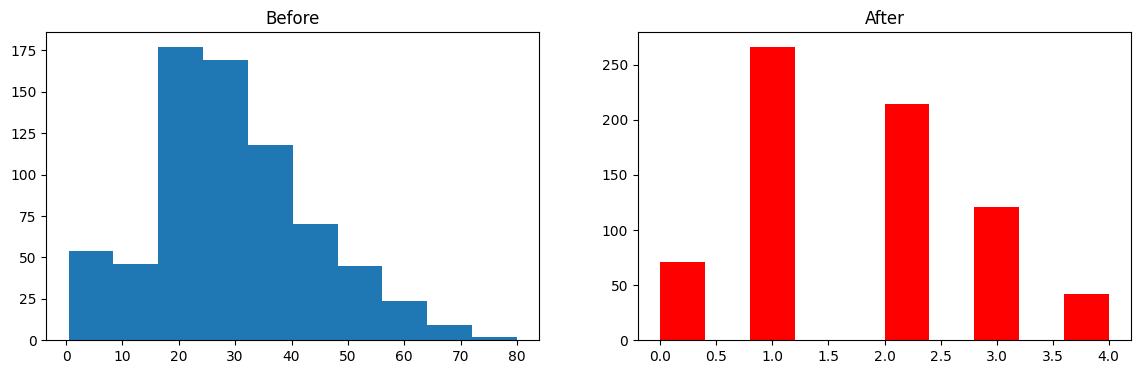

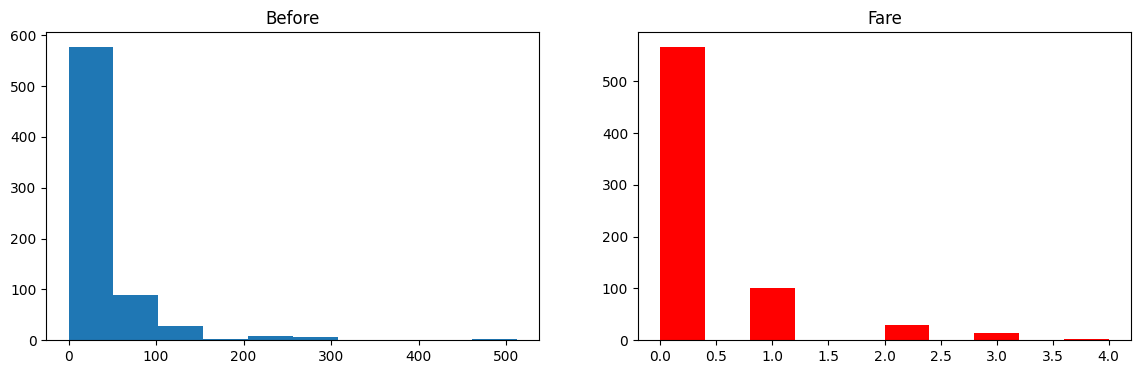

In [76]:
discretize(5,'kmeans')

0.6330790297339592


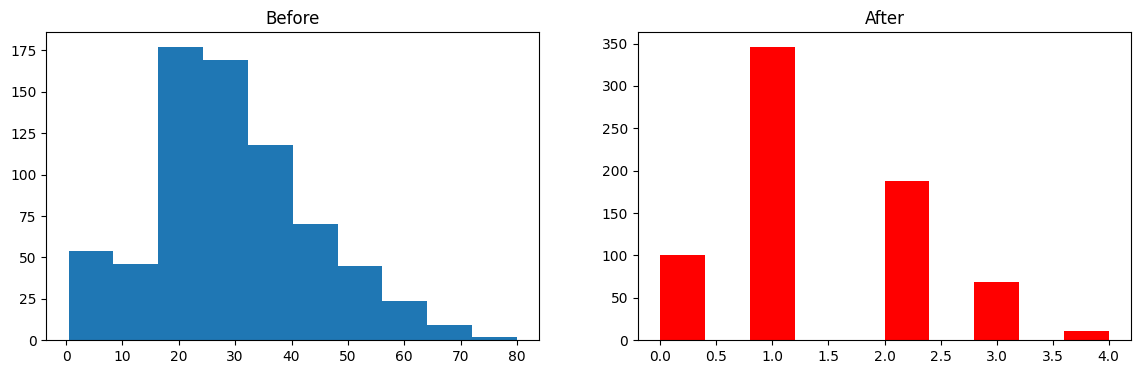

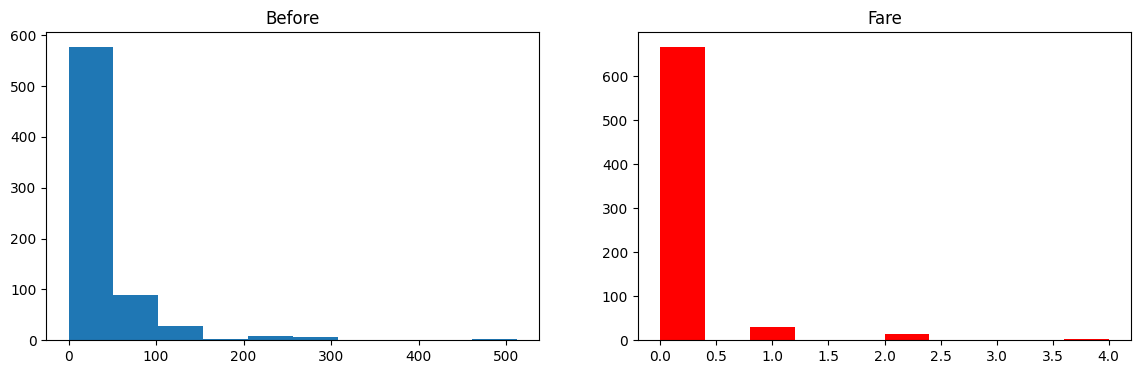

In [77]:
discretize(5,'uniform')

0.6260954616588419


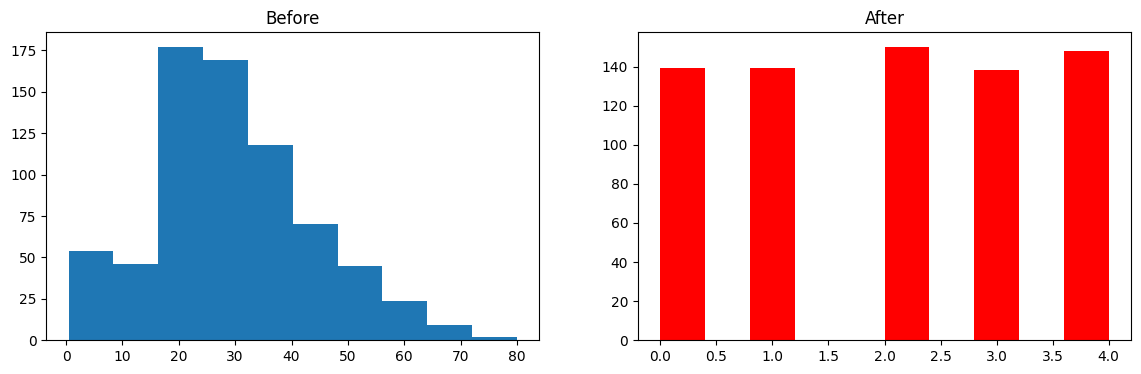

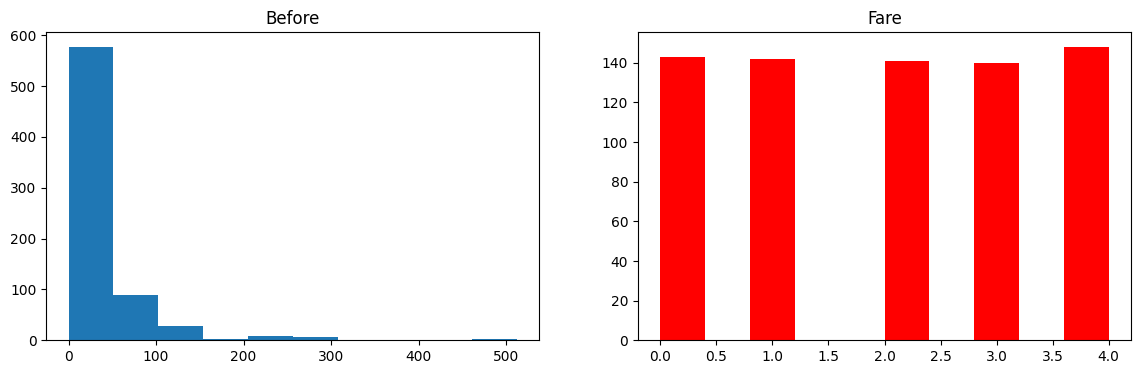

In [78]:
discretize(5,'quantile')